<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/DeepLearning_Bootcamp_1705.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data analysis and wragling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scaling and train test split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

# Evalution on the test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
!unzip /content/kc_house_data.csv.zip

Archive:  /content/kc_house_data.csv.zip
  inflating: kc_house_data.csv       


In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df = df.drop(['id','zipcode'],axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


In [ ]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=100,epochs=350)

Epoch 1/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15103316992.0000 - val_loss: 18845650944.0000
Epoch 2/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14826308608.0000 - val_loss: 18792114176.0000
Epoch 3/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15746376704.0000 - val_loss: 18884890624.0000
Epoch 4/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15576388608.0000 - val_loss: 18842339328.0000
Epoch 5/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15227780096.0000 - val_loss: 18631743488.0000
Epoch 6/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15232817152.0000 - val_loss: 18691969024.0000
Epoch 7/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15473750016.0000 - val_loss: 18918227968.0000
Epoch 8/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14977424384.0000 - val_loss: 18701869056.0000
Epoch 9/350
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14577496064.0000 - val_loss: 18475503616.0000
Epoch 10/350
152/152 ━━━━━━━━━━━━━━━━

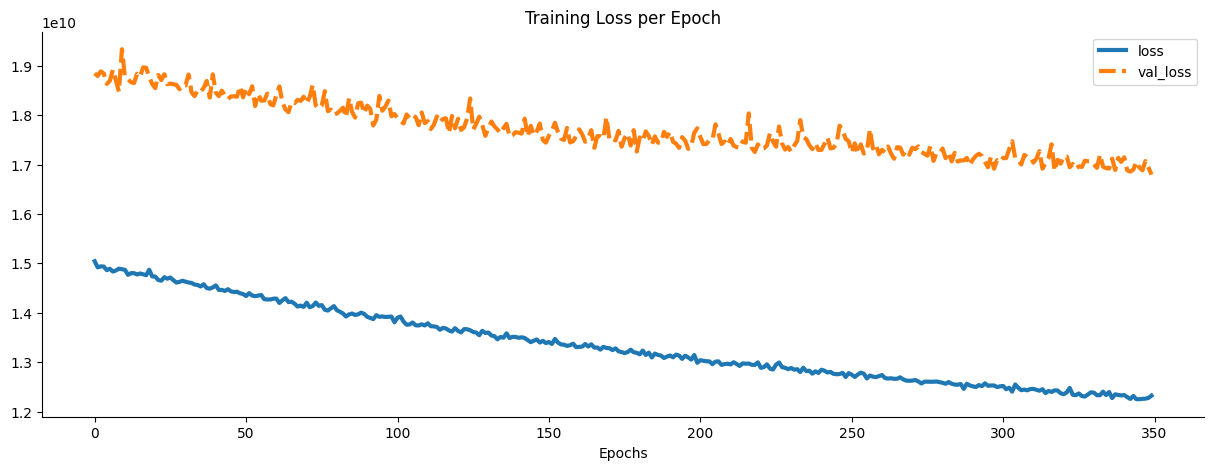

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE:  72651.90277991981
MSE:  16795745037.481934
RMSE:  129598.3990544711
Variance Regression Score:  0.8802719037996884


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [ ]:
# fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Prediction Price: 251951.86

Original Price: 221900.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Save the model
model.save("ann.h5")